## Ejemplo 6: Análisis de Sentimientos

### 1. Objetivos:
    - Aprender a realizar un análisis de sentimientos utilizando TextBlob
    
---
    
### 2. Desarrollo:

El análisis de sentimientos se refiere al uso del procesamiento de lenguaje natural para identificar y extraer información subjetiva de nuestros textos. La información subjetiva tiene que ver con los afectos: desde un punto de vista subjetivo, ¿qué tan positiva o negativa es esta oración?

Hoy en día se utiliza machine learning para hacer análisis de sentimientos, pero como método de introducción al tema, nosotros vamos a utilizar una librería llamada `TextBlob`. `TextBlob` está construida sobre `nltk` y nos da una interfaz sumamente sencilla para realizar análisis de sentimientos. Exploremos un poco nuestro dataset con esta herramienta.

> Lamentablemente, TextBlob sólo puede realizar análisis de sentimientos en inglés, alemán y francés. Es posible traducir de español a inglés usando TextBlob, aunque los resultados no son enteramente satisfactorios.

In [1]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_json('../../Datasets/new_york_times_bestsellers-clean.json')

df.head()

,amazon_product_url,author,description,publisher,title,oid,bestsellers_date.numberLong,published_date.numberLong,rank.numberInt,rank_last_week.numberInt,weeks_on_list.numberInt,price.numberDouble
0,http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,Aliens have taken control of the minds and bod...,"Little, Brown",THE HOST,5b4aa4ead3089013507db18c,1211587200000,1212883200000,2,1,3,25.99
1,http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,A woman's happy marriage is shaken when she en...,St. Martin's,LOVE THE ONE YOU'RE WITH,5b4aa4ead3089013507db18d,1211587200000,1212883200000,3,2,2,24.95
2,http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,A Massachusetts state investigator and his tea...,Putnam,THE FRONT,5b4aa4ead3089013507db18e,1211587200000,1212883200000,4,0,1,22.95
3,http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,An aging porn queens aims to cap her career by...,Doubleday,SNUFF,5b4aa4ead3089013507db18f,1211587200000,1212883200000,5,0,1,24.95
4,http://www.amazon.com/Sundays-at-Tiffanys-Jame...,James Patterson and Gabrielle Charbonnet,A woman finds an unexpected love,"Little, Brown",SUNDAYS AT TIFFANY’S,5b4aa4ead3089013507db190,1211587200000,1212883200000,6,3,4,24.99


In [3]:
grouped_by_title = df.groupby('title')['description'].max()
grouped_by_title = grouped_by_title.str.lower()
grouped_by_title = grouped_by_title.str.strip()
grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')
grouped_by_title = grouped_by_title.str.replace('\d', '')
grouped_by_title = grouped_by_title.str.replace('\\n', '')
grouped_by_title = grouped_by_title.dropna()

Ahora, para poder utilizar `textBlob` hay que correr los siguientes comandos:

`pip install textblob`

`python3 -m textblob.download_corpora`

In [4]:
from textblob import TextBlob

In [5]:
# Crear un objeto TextBlob

TextBlob(grouped_by_title.iloc[100])

TextBlob("in a small town in texas characters from phillipss earlier novels reappear as a woman persuades a friend to call off her wedding to the towns popular mayor")

In [6]:
# Obteniendo análisis de sentimientos

TextBlob(grouped_by_title.iloc[100]).sentiment

Sentiment(polarity=0.11666666666666665, subjectivity=0.6)

'polarity' va de -1 a 1, -1 siendo extremadamente negativo y 1 siendo extremadamente positivo.

'subjectivity' va de 0 a 1, 0 siendo muy objetivo y 1 siendo muy subjetivo.

In [7]:
# Vamos a crear una columna que nos indique la polaridad de todas nuestras descripciones

polarity = grouped_by_title.apply(lambda x: TextBlob(x).sentiment.polarity)
polarity.name = 'polarity'

In [8]:
df_with_polarity = pd.concat([grouped_by_title, polarity], axis=1)

In [9]:
# Vamos a eliminar las polaridades neutrales

df_with_polarity['polarity'] != 0

title
10TH ANNIVERSARY             True
11TH HOUR                   False
1225 CHRISTMAS TREE LANE     True
1356                        False
1Q84                         True
                            ...  
Z                           False
ZERO DAY                     True
ZERO HISTORY                False
ZONE ONE                    False
ZOO                          True
Name: polarity, Length: 754, dtype: bool

In [11]:
no_neutral = df_with_polarity[df_with_polarity['polarity'] != 0]

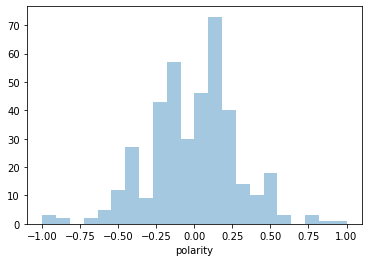

In [12]:
sns.distplot(no_neutral['polarity'], kde=False, norm_hist=False);

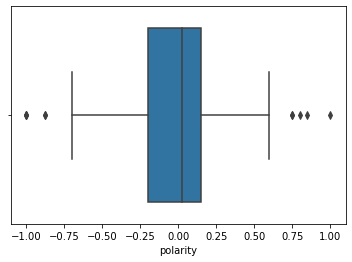

In [13]:
sns.boxplot(no_neutral['polarity']);

In [15]:
no_neutral[no_neutral['polarity'] > 0.75]['description']

title
LOVE THE ONE YOU'RE WITH                    a womans happy marriage is shaken
NYPD RED                    detective zach jordan and his beautiful partne...
TOUCH AND GO                an investigator probing the disappearance of a...
Name: description, dtype: object

In [17]:
# Como puedes ver, al modelo no es muy exacto. Esta descripción, por ejemplo, no es en realidad feliz

no_neutral.loc["LOVE THE ONE YOU'RE WITH", 'description']

description    a womans happy marriage is shaken
Name: LOVE THE ONE YOU'RE WITH, dtype: object

In [19]:
no_neutral.loc["LOVE THE ONE YOU'RE WITH", 'polarity']

polarity    0.8
Name: LOVE THE ONE YOU'RE WITH, dtype: object

In [24]:
no_neutral[no_neutral['polarity'] < -0.75]['description']

title
KINDRED IN DEATH     lt eve dallas investigates the brutal murder o...
MICRO                seven graduate students miniaturized by an evi...
RIVER MARKED         the shapeshifter mercy thompson and her mate t...
THE GLASS RAINBOW    a man with ties to an evil exconvict is dating...
TSAR                 the kremlin has a brutal killer working for it...
Name: description, dtype: object

In [25]:
# Esta sí es una descripción con bastantes tintes negativos

no_neutral.loc["KINDRED IN DEATH", 'description']

'lt eve dallas investigates the brutal murder of a colleagues daughter by nora roberts writing pseudonymously'

In [26]:
no_neutral.loc["KINDRED IN DEATH", 'polarity']

-0.875

Hoy en día existen modelos mucho más precisos para realizar análisis de sentimientos, todos ellos utilizando machine learning para el entrenamiento. Aunque `TextBlob` es algo viejo y por lo tanto no muy preciso, resulta útil para realizar análisis rápidos y generales de nuestros datos.